In [1]:
import skvideo.io
import keras.backend as K
from keras.models import Sequential, Model
from keras.utils.data_utils import get_file
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv3D, MaxPooling3D, ZeroPadding3D
import numpy as np
from os.path import isfile, join
import numpy as np
import pandas as pd
import cv2
import math
import matplotlib.pyplot as plt   
from skimage.transform import resize
import keras
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import h5py
import tensorflow as tf
from keras import backend as K
K.clear_session()
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   #if like me you do not have a lot of memory in your GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "" #then these two lines force keras to use your CPU
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
count = 0
videoFile = "/home/til/Video/data/Fun2.mp4"
videoCapture = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = videoCapture.get(5) # frame rate say for every 5 second
x=1
while(videoCapture.isOpened()):
    frameId = videoCapture.get(1) #current frame number
    ret, frame = videoCapture.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="/home/til/Video/code/Images/frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
videoCapture.release()

In [3]:
from PIL import Image
import os, sys
path = "/home/til/Video/code/Images/"
path1 = "/home/til/Video/code/resize/"
dirs = sorted(os.listdir( path ))
print (dirs)
def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item).convert("RGB")
            f, e = os.path.splitext(path+item)
            imResize = im.resize((112,112), Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=90)

resize()

['frame0.jpg', 'frame1.jpg', 'frame10.jpg', 'frame11.jpg', 'frame12.jpg', 'frame13.jpg', 'frame14.jpg', 'frame15.jpg', 'frame16.jpg', 'frame17.jpg', 'frame18.jpg', 'frame19.jpg', 'frame2.jpg', 'frame20.jpg', 'frame21.jpg', 'frame22.jpg', 'frame23.jpg', 'frame24.jpg', 'frame25.jpg', 'frame26.jpg', 'frame27.jpg', 'frame28.jpg', 'frame29.jpg', 'frame3.jpg', 'frame30.jpg', 'frame31.jpg', 'frame32.jpg', 'frame33.jpg', 'frame34.jpg', 'frame35.jpg', 'frame36.jpg', 'frame37.jpg', 'frame38.jpg', 'frame39.jpg', 'frame4.jpg', 'frame40.jpg', 'frame41.jpg', 'frame42.jpg', 'frame43.jpg', 'frame44.jpg', 'frame45.jpg', 'frame46.jpg', 'frame47.jpg', 'frame48.jpg', 'frame49.jpg', 'frame5.jpg', 'frame50.jpg', 'frame51.jpg', 'frame52.jpg', 'frame53.jpg', 'frame54.jpg', 'frame55.jpg', 'frame56.jpg', 'frame57.jpg', 'frame58.jpg', 'frame59.jpg', 'frame6.jpg', 'frame60.jpg', 'frame61.jpg', 'frame62.jpg', 'frame7.jpg', 'frame8.jpg', 'frame9.jpg']


In [4]:
from keras.preprocessing.image import load_img
# load the image
img = load_img('/home/til/Video/code/Images/frame1.jpg')
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
img.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(112, 112)


In [5]:
images = []
for item in dirs:
    if os.path.isfile(path+item):
        img =  cv2.imread(path+item)
        X = np.array(img)
        X = X.astype('float32')
        #Normalize X
        X /= 255.0

        images.append(X)
    
    
# convert to RGB, if needed
   # img = img.convert('RGB')
# convert to array
   
  
    
images = np.array(images)

In [6]:
print(images.shape)

(63, 112, 112, 3)


In [7]:
 x_train = images


In [8]:
m = 4; n = 1; k = 35;
X_train = np.zeros((x_train.shape[0]-k-m, x_train.shape[1], x_train.shape[2], x_train.shape[3], m));
Y_train = np.zeros((x_train.shape[0]-k-m, x_train.shape[1], x_train.shape[2], x_train.shape[3]));
X_test = np.zeros((k, x_train.shape[1], x_train.shape[2], x_train.shape[3], m));
Y_test = np.zeros((k, x_train.shape[1], x_train.shape[2], x_train.shape[3]));
for i in range(x_train.shape[0]-m-k):
    for j in range(m):
        X_train[i,:,:,:,j] = x_train[i+j]
    Y_train[i] = x_train[i+m]
for i in range(x_train.shape[0]-m-k, x_train.shape[0]-m):
    for j in range(m):
        X_test[i-x_train.shape[0]+m+k,:,:,:,j] = x_train[i+j]
    Y_test[i-x_train.shape[0]+m+k] = x_train[i+m]

X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3]*m])
X_test = np.reshape(X_test, [X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3]*m])

In [9]:
np.amax(X_train)

1.0

In [10]:
X_train.shape

(24, 112, 112, 12)

In [11]:
Y_train.shape

(24, 112, 112, 3)

In [12]:

from keras.layers import TimeDistributed
from keras.layers import Input, Dense
from keras.models import Model
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Input, Reshape
from tensorflow.python.keras.layers import Conv2D, UpSampling2D, BatchNormalization
from tensorflow.python.keras.layers import LeakyReLU
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras import backend as K
from keras.layers.pooling import MaxPooling2D
input_d = Input(shape = (112, 112, 3*m,))
layerd1 = Conv2D(64, (3, 3), strides = (2, 2), padding = 'same', activation='relu') (input_d)
layerd1 = BatchNormalization(momentum=0.8)(Dropout(0.25)(LeakyReLU(alpha=0.2)(layerd1)))
layerd1 = UpSampling2D()(layerd1)

layerd2 = Conv2D(64, (3, 3), strides = (2, 2), padding = 'same', activation='relu') (layerd1)
layerd2 = BatchNormalization(momentum=0.8)(Dropout(0.25)(LeakyReLU(alpha=0.2)(layerd2)))
layerd2 = UpSampling2D()(layerd2)

layerd3 = Conv2D(64, (3, 3), strides = (2, 2), padding = 'same', activation='relu') (layerd2)
layerd3 = BatchNormalization(momentum=0.8)(Dropout(0.25)(LeakyReLU(alpha=0.2)(layerd3)))
layerd3 = UpSampling2D()(layerd3)

#layerd4 = Conv2D(32, (2, 2), activation='elu', padding='same')(layerd3)

#vec = Flatten()(layerd4)
#x = Dense(1024, activation='sigmoid',name='encode10')(vec)
output = Conv2D(3, (3, 3), padding = 'same', activation='relu') (layerd3)


model_d = Model(inputs=input_d, outputs=output);

In [13]:
model_d.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 112, 112, 12)]    0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 64)        6976      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 56, 56, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 64)        256       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        36928 

In [14]:

model_d.compile(loss='binary_crossentropy',
            optimizer='adam', metrics=['accuracy'])

In [15]:
stopper = EarlyStopping(monitor='acc',
                              min_delta=0,
                              patience=0,
                              verbose=1, mode='auto')
model_d.fit(X_train, Y_train, 
          batch_size=8, epochs=10, callbacks=[stopper], verbose=1)

Epoch 1/10
3/3 [==============================] - 0s 105ms/step - loss: 5.4612 - accuracy: 0.3094
Epoch 2/10
3/3 [==============================] - 0s 106ms/step - loss: 5.3845 - accuracy: 0.3109
Epoch 3/10
3/3 [==============================] - 0s 106ms/step - loss: 5.3494 - accuracy: 0.3156
Epoch 4/10
3/3 [==============================] - 0s 106ms/step - loss: 5.3401 - accuracy: 0.3269
Epoch 5/10
3/3 [==============================] - 0s 106ms/step - loss: 5.3985 - accuracy: 0.3427
Epoch 6/10
3/3 [==============================] - 0s 107ms/step - loss: 5.4408 - accuracy: 0.3581
Epoch 7/10
3/3 [==============================] - 0s 106ms/step - loss: 5.4604 - accuracy: 0.3687
Epoch 8/10
3/3 [==============================] - 0s 106ms/step - loss: 5.4774 - accuracy: 0.3738
Epoch 9/10
3/3 [==============================] - 0s 107ms/step - loss: 5.4806 - accuracy: 0.3746
Epoch 10/10
3/3 [==============================] - 0s 107ms/step - loss: 5.4484 - accuracy: 0.3785


In [16]:
Yhat_test = model_d.predict(X_test)

In [17]:
import numpy as np
import math

def psnr(img1, img2):
    mse = np.mean((img1-img2)**2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
print(psnr(Yhat_test[8,:,:,:],Y_test[8,:,:,:]))

52.39928762018134


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


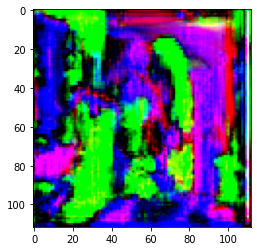

In [18]:
import matplotlib.pyplot as plt
plt.imshow(Yhat_test[8,:,:,:])